Miembros del grupo

Se desea obtener 3 modelos distintos para un conjunto de datos

Grupo 9:


*   Martín, Gustavo
*   Martinez, Carlos
*   Martínez, Santiago
*   Mattio, Gaston Cesar
*   Pasquini, Santiago
*   Renato, Rosario
*   Yuvero, María Celeste


In [6]:
import gdown
url = 'https://drive.google.com/uc?id=1Jf4AXGbaPVvlTxB_OJiVfEPqZyGJ4FNS'
output = 'Patient.csv'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Jf4AXGbaPVvlTxB_OJiVfEPqZyGJ4FNS
To: c:\Users\gusta\Desktop\DigitalHouse\TP 3 Resolución\Python\Patient.csv
100%|██████████| 152k/152k [00:00<00:00, 2.21MB/s]


'Patient.csv'

a

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score

data = pd.read_csv('../Data/Patient.csv')

data.dtypes

HAEMATOCRIT     float64
HAEMOGLOBINS    float64
ERYTHROCYTE     float64
LEUCOCYTE       float64
THROMBOCYTE       int64
MCH             float64
MCHC            float64
MCV             float64
AGE               int64
SEX              object
SOURCE            int64
dtype: object

In [8]:
sns.heatmap(data.corr(), annot=True, vmin=-1, cmap='Blues');

#Breve descripción de las variables que utilizaremos

Hematocrit: Es el porcentaje de volumen que ocupan los glóbulos rojos en la sangre.

Hemoglobins: Es una proteína que transporta oxígeno en los glóbulos rojos.

Eritrocitos: Son glóbulos rojos encargados del transporte de oxígeno.

Leucocitos: Son glóbulos blancos que ayudan al sistema inmunitario.

Trombocitos: Son plaquetas que participan en la coagulación sanguínea.

MCH (Mean Corpuscular Hemoglobin): Es el contenido promedio de hemoglobina en cada glóbulo rojo.

MCHC (Mean Corpuscular Hemoglobin Concentration): Es la concentración promedio de hemoglobina en los glóbulos rojos.

MCV (Mean Corpuscular Volume): Es el volumen promedio de los glóbulos rojos.

AGE: Edad del paciente

SEX: sexo del paciente

SOURCE: internado o ambulatorio

In [ ]:
#Exploracion
# ¿Cuántas observaciones hay en la tabla? ¿Tenemos datos faltantes?
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3309 entries, 0 to 3308
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HAEMATOCRIT   3309 non-null   float64
 1   HAEMOGLOBINS  3309 non-null   float64
 2   ERYTHROCYTE   3309 non-null   float64
 3   LEUCOCYTE     3309 non-null   float64
 4   THROMBOCYTE   3309 non-null   int64  
 5   MCH           3309 non-null   float64
 6   MCHC          3309 non-null   float64
 7   MCV           3309 non-null   float64
 8   AGE           3309 non-null   int64  
 9   SEX           3309 non-null   object 
 10  SOURCE        3309 non-null   int64  
dtypes: float64(7), int64(3), object(1)
memory usage: 284.5+ KB


MANIPULACIÓN DE DATOS

In [ ]:
# Manipulación. Cambio a valor númerico la columna SEX para poder trabajar luego

data['SEX'].replace({'M': 0, 'F': 1}, inplace=True)

In [ ]:
# Primero, selecciono solo las columnas que contienen valores no numéricos
cols_to_convert = data.select_dtypes(include=['object']).columns

# Luego, uso el método apply para aplicar la función pd.to_numeric a cada columna seleccionada
data[cols_to_convert] = data[cols_to_convert].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Inspeccionamos el vector objetivo
data ['SOURCE'].unique()

# Analizamos la proporción entre clases
#pd.Series(y).value_counts(normalize=True).round(2)

array([1, 0])

In [ ]:
# Preparamos la matriz de features y el vector objetivo
X = data.drop(columns=['SOURCE'])
y = data['SOURCE']

In [ ]:
#  Vamos a separar los datos en los conjuntos de train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=12)

In [ ]:
display(y_train.value_counts(normalize=True).round(2))
display(y_test.value_counts(normalize=True).round(2))

0    0.6
1    0.4
Name: SOURCE, dtype: float64

0    0.6
1    0.4
Name: SOURCE, dtype: float64

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Naive Bayes

# Naive Bayes

Para analizar que tipo de Naive Bayes usaremos tenemos que analizar las variables. Analizar si son continuas o categoricas y en caso de ser continuas analizar su normalidad

In [ ]:
data.value_counts()

HAEMATOCRIT  HAEMOGLOBINS  ERYTHROCYTE  LEUCOCYTE  THROMBOCYTE  MCH   MCHC  MCV   AGE  SEX  SOURCE
13.7         4.4           1.48         5.3        263          29.7  32.1  92.6  68   1    0         1
41.2         13.6          4.81         6.4        289          28.3  33.0  85.7  46   1    0         1
41.1         14.2          5.02         6.1        279          28.3  34.5  81.9  22   0    0         1
41.2         13.0          4.88         15.0       178          26.6  31.6  84.4  1    1    1         1
             13.1          4.64         7.1        238          28.2  31.8  88.8  68   0    0         1
                                                                                                     ..
36.1         12.1          3.89         5.7        297          31.1  33.5  92.8  52   1    0         1
                           4.06         5.0        94           29.8  33.5  88.9  45   1    1         1
                           4.19         16.4       271          28.9 

Al hacer un análisis rápido se puede ver que solo SEX es categórica. Ahora analicemos normalidad

In [ ]:
data.columns

Index(['HAEMATOCRIT', 'HAEMOGLOBINS', 'ERYTHROCYTE', 'LEUCOCYTE',
       'THROMBOCYTE', 'MCH', 'MCHC', 'MCV', 'AGE', 'SEX', 'SOURCE'],
      dtype='object')

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

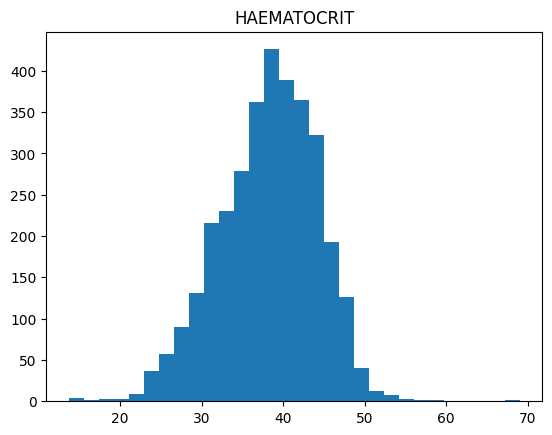

HAEMATOCRIT no siguen una distribución normal (p-valor: 1.9213753851832216e-13)


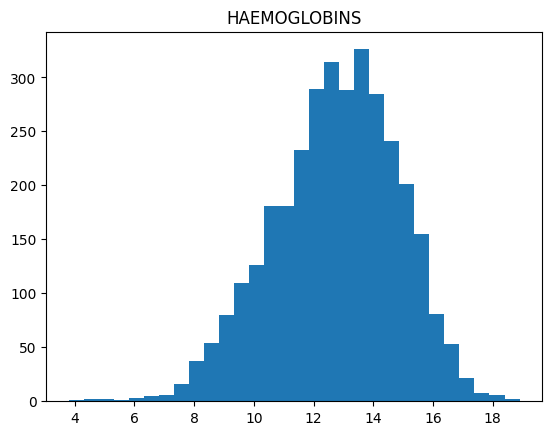

HAEMOGLOBINS no siguen una distribución normal (p-valor: 1.601900036229953e-12)


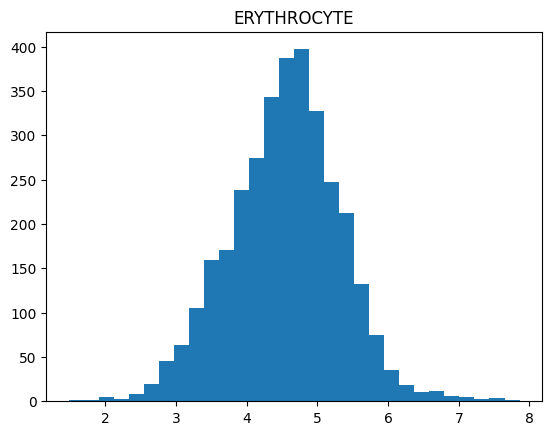

ERYTHROCYTE no siguen una distribución normal (p-valor: 1.3935954612520618e-08)


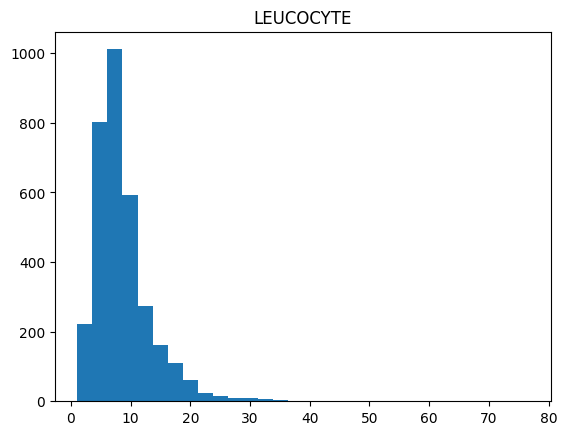

LEUCOCYTE no siguen una distribución normal (p-valor: 0.0)


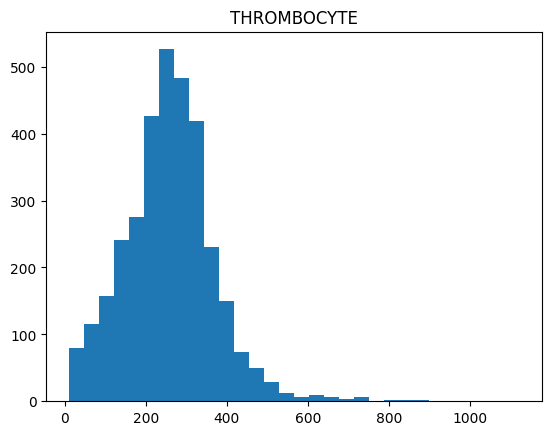

THROMBOCYTE no siguen una distribución normal (p-valor: 9.770308811718286e-30)


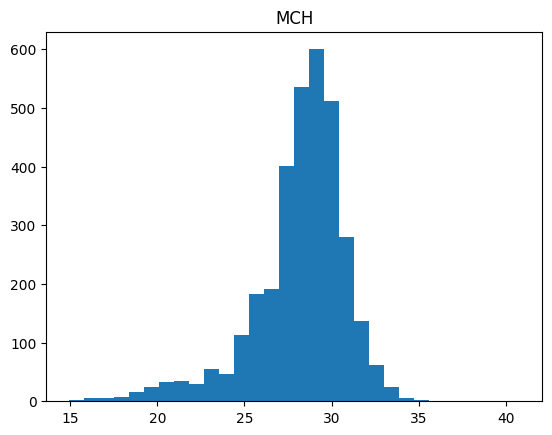

MCH no siguen una distribución normal (p-valor: 7.083363351481552e-39)


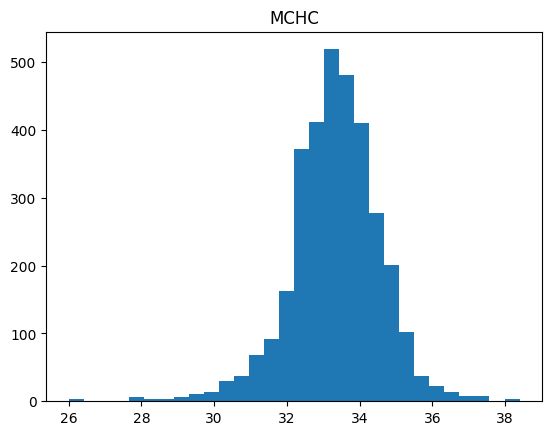

MCHC no siguen una distribución normal (p-valor: 1.501287197627534e-26)


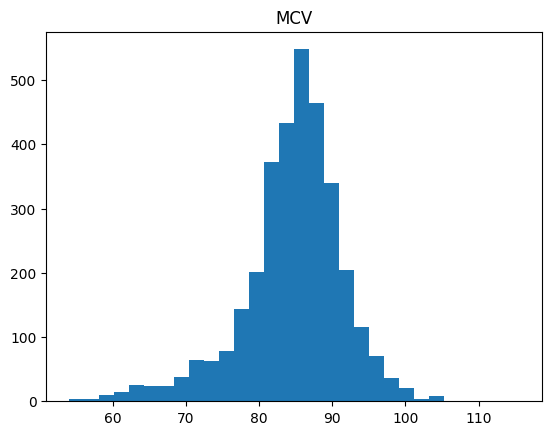

MCV no siguen una distribución normal (p-valor: 1.0161901338847262e-30)


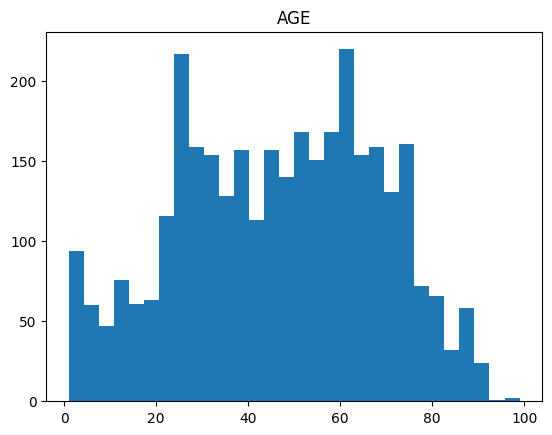

AGE no siguen una distribución normal (p-valor: 7.483380217145066e-21)


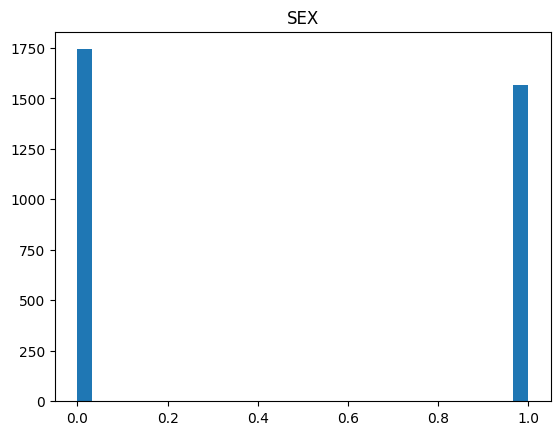

SEX no siguen una distribución normal (p-valor: 0.0)


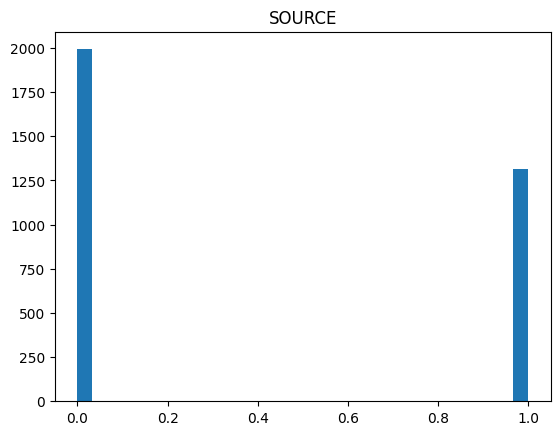

SOURCE no siguen una distribución normal (p-valor: 0.0)


In [ ]:
import pandas as pd
import scipy.stats as stats
def statistic(x):
    # Get only the `shapiro` statistic; ignore its p-value
    return stats.shapiro(x).statistic


# Supongamos que tienes tu DataFrame llamado 'df' y quieres analizar la normalidad de la columna 'columna_datos'

for col in data.columns:
  # Obtén los datos de la columna que deseas analizar
  datos = data[col]

  # Realiza la prueba de Shapiro-Wilk
  stat, p_valor = stats.shapiro(datos)

  # Define un umbral para el valor p (por ejemplo, 0.05)
  umbral = 0.85
  plt.hist(datos,bins=30)
  plt.title(col)
  plt.show()

  # Comprueba si los datos son normales o no
  """
  if stat > umbral:
      print(f"{col} siguen una distribución normal (stat: {stat})")
  else:
      print(f"{col} no siguen una distribución normal (stat: {stat})")
  """
  if p_valor > umbral:
      print(f"{col} siguen una distribución normal (p-valor: {p_valor})")
  else:
      print(f"{col} no siguen una distribución normal (p-valor: {p_valor})")


In [ ]:
X = data.drop(['SOURCE','SEX','HAEMOGLOBINS','ERYTHROCYTE'], axis=1)
Y = data['SOURCE']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1237)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(2316, 7)
(993, 7)
(2316,)
(993,)


In [ ]:
gnb = GaussianNB()

gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

print(f'Accuracy: {round(accuracy_score(Y_test, Y_pred), 2)}')
print(f'Precision: {round(precision_score(Y_test, Y_pred), 2)}')
print(f'Recall: {round(recall_score(Y_test, Y_pred), 2)}')

print(f'F1 Score: {round(f1_score(Y_test, Y_pred), 2)}')


Accuracy: 0.72
Precision: 0.71
Recall: 0.48
F1 Score: 0.57


In [ ]:

conf_mat = confusion_matrix(Y_test, Y_pred)

print('Confusion matrix\n\n', conf_mat)

Confusion matrix

 [[525  77]
 [203 188]]


AUC: 0.77


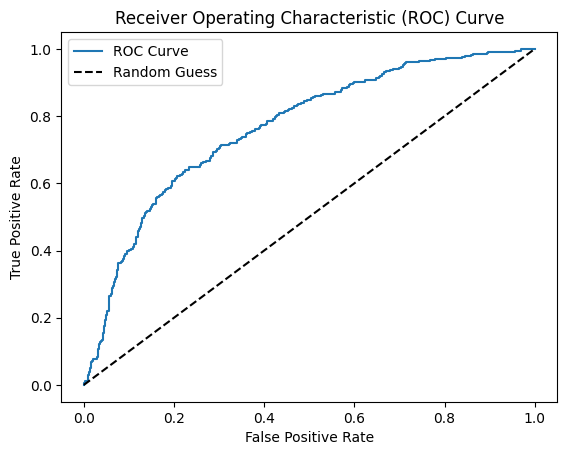

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_curve, roc_auc_score

# Obtener las probabilidades de predicción en lugar de las predicciones binarias
Y_prob = gnb.predict_proba(X_test)[:, 1]

# Calcular el AUC
auc = roc_auc_score(Y_test, Y_prob)
print(f'AUC: {round(auc, 2)}')

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(Y_test, Y_prob)


import matplotlib.pyplot as plt
plt.plot(fpr, tpr, label='ROC Curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


 Esto sugiere que el modelo tiene una capacidad moderada para distinguir entre las clases "internado" y "ambulatorio". Tambien indica que el modelo tiene una habilidad significativa para realizar predicciones mejores que las predicciones aleatorias.

#MODELO DE PRUEBA DE KNN.

```
```



In [ ]:
# Instanciamos el modelo con su configuración por defecto
knn = KNeighborsClassifier()

In [ ]:
# Ajustamos a los datos de entrenamiento
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predecimos etiquetas para los datos de test
y_pred = knn.predict(X_test)

In [ ]:
# Evaluamos el accuracy del modelo

accuracy_score(y_test, y_pred).round(2)

0.73

In [ ]:
# Nuestro modelo puede clasificar correctamente el 60% de los pacientes ingresados

Optimizando el valor de k

Ahora vamos a entrenar varios modelos de KNeighborsClassifier probando distintos valores posibles para el hiperparámetro n_neighbors dentro de un esquema de cross-validation:

In [ ]:
# Vamos a querer graficar los distintos valores del score de cross validation en función del hiperparámetro n_neighbors. Para esto generamos una lista de
# diccionarios que después se puede convertir fácilmente en DataFrame.

# Probamos todos los enteros desde el 1 hasta el 20 como posibles valores de n_neighbors a explorar.

# Definimos la estrategia de validación cruzada
kf = KFold(n_splits=5, shuffle=True, random_state=12)

scores_para_data = []

for i in range(1, 21):

    # En cada iteración, instanciamos el modelo con un hiperparámetro distinto
    model = KNeighborsClassifier(n_neighbors=i)

    # cross_val_scores nos devuelve un array de 5 resultados,
    # uno por cada partición que hizo automáticamente CV
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)

    # Para cada valor de n_neighbours, creamos un diccionario con el valor
    # de n_neighbours y la media y el desvío de los scores
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}

    # Guardamos cada uno en la lista de diccionarios
    scores_para_data.append(dict_row_score)

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
data_scores = pd.DataFrame(scores_para_data)
data_scores.head()

,score_medio,score_std,n_neighbors
0,0.677957,0.024373,1
1,0.695295,0.026034,2
2,0.700931,0.020318,3
3,0.709797,0.020328,4
4,0.707782,0.014751,5


In [ ]:
# Graficando la búsqueda del mejor hiperparámetro

#Una vez que tenemos la tabla con la performance para cada valor del hiperparámetro, hacemos un gráfico con los valores obtenidos.

#Para darnos una idea de la dispersión, vamos a graficar también las líneas que indican un desvío estándar por encima y por debajo de la media.

# Generamos los límites inferior y superior

data_scores['limite_inferior'] = data_scores['score_medio'] - data_scores['score_std']
data_scores['limite_superior'] = data_scores['score_medio'] + data_scores['score_std']
data_scores.head()

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
0,0.677957,0.024373,1,0.653584,0.702331
1,0.695295,0.026034,2,0.669261,0.721329
2,0.700931,0.020318,3,0.680613,0.721249
3,0.709797,0.020328,4,0.689469,0.730125
4,0.707782,0.014751,5,0.693031,0.722534


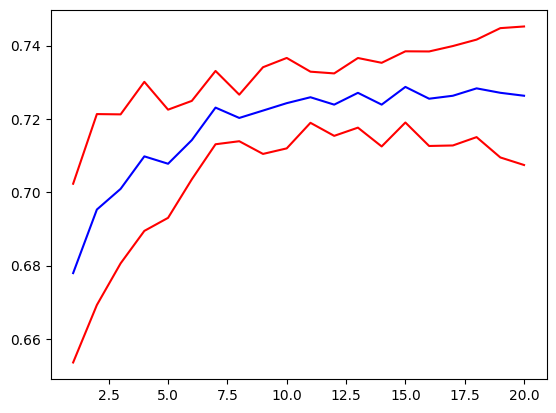

In [ ]:
# Graficamos los resultados
plt.plot(data_scores['n_neighbors'], data_scores['limite_inferior'], color='r')
plt.plot(data_scores['n_neighbors'], data_scores['score_medio'], color='b')
plt.plot(data_scores['n_neighbors'], data_scores['limite_superior'], color='r');

In [ ]:
# Identificamos el score máximo
data_scores.loc[data_scores.score_medio == data_scores.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_inferior,limite_superior
14,0.72874,0.009708,15,0.719032,0.738449


In [ ]:
# Luego de la validación cruzada, identificamos que el valor de n_neighbors que maximiza el score promedio es 20.

#### Repetiremos el proceso pero estandarizando la matriz de *features*

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [ ]:
# Verificamos que las variables ahora tengan media 0 y desvío 1.
print('Medias:', np.mean(X_train, axis=0).round(2))
print('Desvio:', np.std(X_train, axis=0).round(2))

Medias: [ 0.  0.  0. -0.  0.  0.  0.  0.  0. -0.]
Desvio: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [ ]:
# Calculamos nuevamente los scores de cross validation,
# pero esta vez sobre los features estandarizados:

scores_para_data_standard = []

for i in range(1, 21):
    model = KNeighborsClassifier(n_neighbors=i)
    cv_scores = cross_val_score(model, X_train, y_train, cv=kf)
    dict_row_score = {'score_medio':np.mean(cv_scores),
                      'score_std':np.std(cv_scores), 'n_neighbors':i}
    scores_para_data_standard.append(dict_row_score)

In [ ]:
# Creamos el DataFrame a partir de la lista de diccionarios
data_scores_standard = pd.DataFrame(scores_para_data_standard)
data_scores_standard.head()

,score_medio,score_std,n_neighbors
0,0.677957,0.024373,1
1,0.695295,0.026034,2
2,0.700931,0.020318,3
3,0.709797,0.020328,4
4,0.707782,0.014751,5


In [ ]:
# Armamos nuevamente los límites para graficar
data_scores_standard['limite_superior'] = data_scores_standard['score_medio'] + data_scores_standard['score_std']
data_scores_standard['limite_inferior'] = data_scores_standard['score_medio'] - data_scores_standard['score_std']
data_scores_standard.head()

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
0,0.677957,0.024373,1,0.702331,0.653584
1,0.695295,0.026034,2,0.721329,0.669261
2,0.700931,0.020318,3,0.721249,0.680613
3,0.709797,0.020328,4,0.730125,0.689469
4,0.707782,0.014751,5,0.722534,0.693031


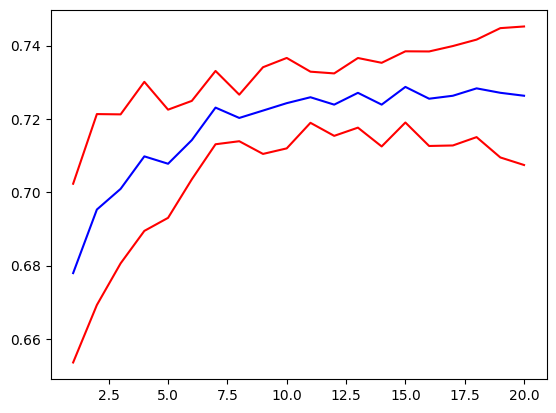

In [ ]:
# Graficamos los resultados
plt.plot(data_scores_standard['n_neighbors'], data_scores_standard['limite_inferior'], color='r')
plt.plot(data_scores_standard['n_neighbors'], data_scores_standard['score_medio'], color='b')
plt.plot(data_scores_standard['n_neighbors'], data_scores_standard['limite_superior'], color='r');

In [ ]:
# Identificamos el score máximo
data_scores_standard.loc[data_scores_standard.score_medio == data_scores_standard.score_medio.max()]

,score_medio,score_std,n_neighbors,limite_superior,limite_inferior
14,0.72874,0.009708,15,0.738449,0.719032


In [ ]:
# Notamos que esta vez nuestro score promedio es 65. Nuestro modelo ha mejorado levemente

#Ahora que decidimos cuál es el mejor preprocesamiento y el mejor valor posible para el hiperparámetro n_neighbors, podemos reentrenar el modelo y evaluar los resultados sobre test.

# Asignamos el valor del k óptimo a una variable
best_k = data_scores_standard.loc[data_scores_standard.score_medio == data_scores_standard.score_medio.max(), 'n_neighbors'].values[0]
best_k

15

In [ ]:
# Elegimos el modelo óptimo de acuerdo a las pruebas de cross validation
model = KNeighborsClassifier(n_neighbors=best_k)

# Lo ajustamos sobre los datos de entrenamiento
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=15)

In [ ]:
# Evaluamos qué accuracy obtenemos en train
accuracy_score(y_train, model.predict(X_train)).round(2)

0.76

In [ ]:
# Nuestro KNN está alcanzando un accuracy score del orden del 67% sobre los datos de entrenamiento.
#Veamos si es capaz de generalizar sobre el conjunto de testeo con una performance similar.

# Lo utilizamos para predecir en test
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)

# Evaluamos el accuracy del modelo en test
accuracy_score(y_test, y_pred).round(2)

0.74

In [ ]:
# uestro modelo tiene una baja capacidad de generalización, pudiendo clasificar correctamente al 60% de los pacientes internados de test.

# Matriz de confusión
# Además de evaluar la capacidad predictiva del modelo a partir del accuracy, queremos contar con un poco más de detalle acerca de los resultados de nuestro clasificador.

#Para esto, generaremos la matriz de confusión

cm = confusion_matrix(y_test, y_pred)
cm

array([[424,  74],
       [138, 192]])

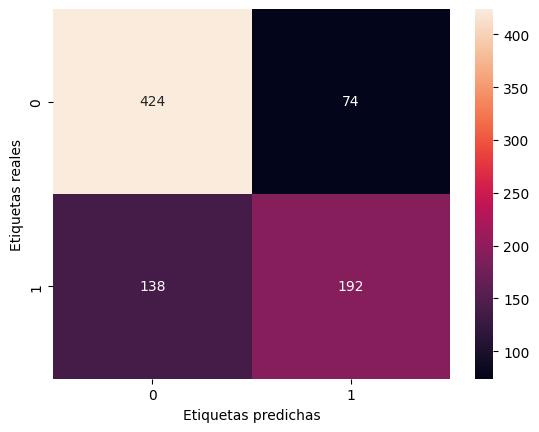

In [ ]:
# Graficamos la matriz de confusión para visualizarla mejor
sns.heatmap(cm, annot=True, fmt='d')

plt.ylabel('Etiquetas reales')
plt.xlabel('Etiquetas predichas')
plt.show()


#¿Cómo interpretamos esta tabla?

# RECHEQUEAR INTERPRETACION DE LA MATRIZ

#La primera fila corresponde a los casos negativos reales (pacientes egresados) y la segunda, a los casos positivos reales (pacientes internados).
#La primera columna corresponde a los casos negativos predichos (pacientes eresados) y la segunda, a los casos positivos predichos (pacientes internados).
#En la diagonal de la matriz se encuentran las clasificaciones correctas: nuestro modelo detectó correctamente 498 pacientes egresados y 0 pacientes internados.
#Los elementos por fuera de la diagonal indican las confusiones del modelo (de ahí el nombre de la matriz): nuestro modelo confunde 330 pacientes egresados y 0 pacientes internados, asignándoles etiquetas incorrectas.
#Esto es probablemente debido a que es un modelo que clasifica por aproximacion

In [ ]:
# Entonces, regresando al accuracy score
accuracy_score(y_test, y_pred).round(2)

# En conclusion, aplicando KNN sobre el dataset de pacientes podemos distinguir apenas con un 60% de exactitud los pacientes egresados.

0.74

#Regresión Logística

In [ ]:
data['SEX'].replace({'M': 0, 'F': 1}, inplace=True)

volvemos a seleccionar la variable target y las features


In [ ]:
X = data.drop(columns=['SOURCE'])
y = data['SOURCE']

Separamos los datos en los conjuntos de train y test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 0)

In [ ]:
y_train.mean(), y_test.mean()

(0.3978234582829504, 0.39855072463768115)

Estandarizamos los datos para que la regularización sea correcta

In [ ]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

Ajustamos el modelo

In [ ]:
lr = LogisticRegression(solver='lbfgs', max_iter=1000)
lr.fit(X_train_std, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = lr.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [ ]:
y_test.value_counts()

0    498
1    330
Name: SOURCE, dtype: int64

Evaluamos el modelo con diferentes métricas y hacemos la matríz de confusión

In [ ]:
accuracy_score(y_train, lr.predict(X_train_std))

0.7194679564691656

Text(50.722222222222214, 0.5, 'Reales')

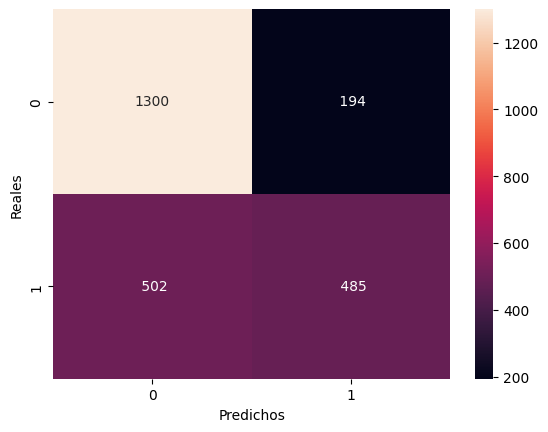

In [ ]:
sns.heatmap(confusion_matrix(y_train, lr.predict(X_train_std)), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [ ]:
print('Accuracy=', accuracy_score(y_test, y_pred))
print('Recall=', recall_score(y_test, y_pred))
print('Precision=', precision_score(y_test, y_pred))
print('F1_score=',f1_score(y_test,y_pred))

Accuracy= 0.7282608695652174
Recall= 0.4818181818181818
Precision= 0.7464788732394366
F1_score= 0.5856353591160222


In [ ]:
probs = lr.predict_proba(X_test)
probs_1 = probs[:,1]
probs_1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1.50045205e-011, 6.79792563e-030, 1.48031654e-060, 2.36984935e-087,
       1.10615336e-103, 9.20209421e-071, 4.53397748e-117, 1.80547928e-001,
       3.35216314e-090, 1.30480071e-084, 9.28728248e-105, 1.80680592e-109,
       2.73840938e-075, 1.26216449e-024, 9.88459546e-001, 1.79130210e-058,
       1.76238565e-052, 1.01843562e-061, 1.74278220e-067, 6.11876122e-077,
       1.65643441e-003, 2.59705353e-044, 1.61736698e-108, 1.97497263e-068,
       5.13966710e-076, 1.42977041e-148, 4.93748934e-072, 3.85742138e-105,
       3.01521025e-042, 2.95105261e-012, 5.47220866e-042, 1.23932395e-098,
       2.81752641e-092, 1.08672978e-052, 6.18548684e-053, 2.42187543e-132,
       2.67527230e-056, 1.11770277e-083, 7.39215592e-131, 6.18905576e-069,
       4.54986941e-010, 9.28475728e-058, 3.52423935e-105, 1.68848614e-076,
       7.27352716e-051, 5.20383585e-051, 1.16314578e-130, 9.34889301e-056,
       2.57777403e-026, 2.73056446e-094, 2.16654863e-049, 1.35495740e-043,
       1.93753412e-093, 1

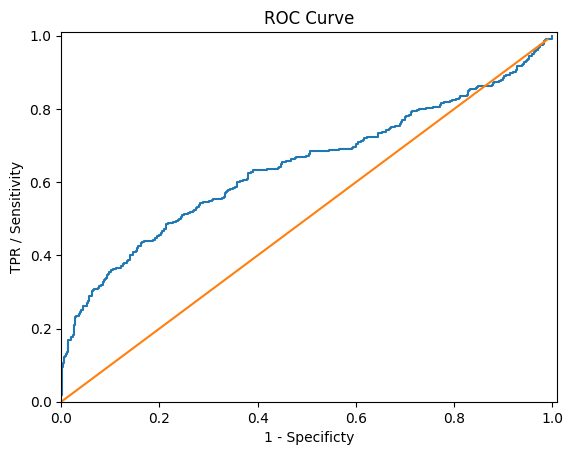

In [ ]:
fpr,tpr,_ = roc_curve(y_test, probs[:,1])
df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))
plt.axis([0, 1.01, 0, 1.01])
plt.xlabel('1 - Specificty')
plt.ylabel('TPR / Sensitivity')
plt.title('ROC Curve')
plt.plot(df['fpr'],df['tpr'])
plt.plot(np.arange(0,1, step =0.01), np.arange(0,1, step =0.01))
plt.show()

Cambiar el umbral

In [ ]:
lr.predict_proba(X_train_std[y_train==0])[:,1]

array([0.23127635, 0.21316819, 0.25298779, ..., 0.35521829, 0.13901862,
       0.52023722])

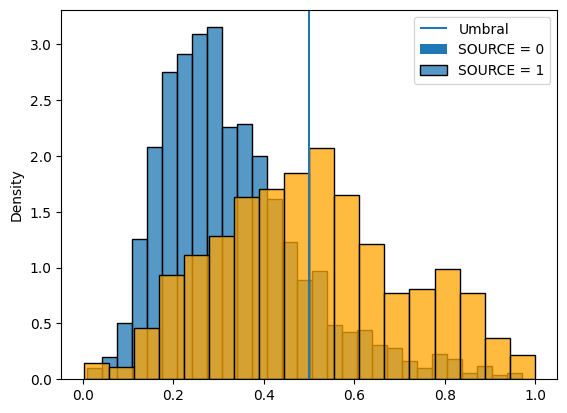

In [ ]:
sns.histplot(data = lr.predict_proba(X_train_std[y_train==0])[:,1], stat = 'density')
sns.histplot(data = lr.predict_proba(X_train_std[y_train==1])[:,1], stat = 'density', color = 'orange')
ylim = plt.ylim()
plt.vlines(0.5, ylim[0], ylim[1])
plt.ylim(ylim)
plt.legend(['Umbral', 'SOURCE = 0', 'SOURCE = 1'])

In [ ]:
umbral = 0.4
probs = lr.predict_proba(X_train_std)[:,1]
y_pred_train = probs > umbral

In [ ]:
accuracy_score(y_train, y_pred_train)

0.7089883111648528

Text(50.722222222222214, 0.5, 'Reales')

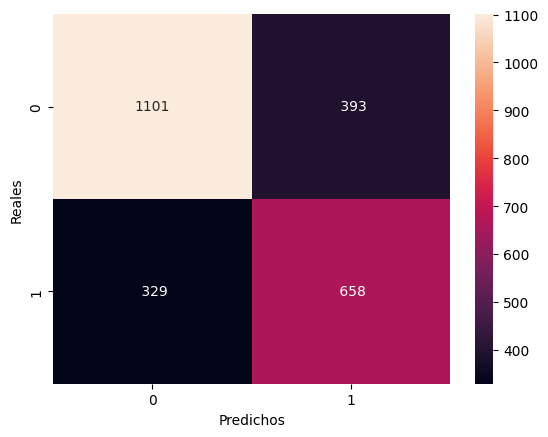

In [ ]:
sns.heatmap(confusion_matrix(y_train, y_pred_train), annot=True, fmt='4d')
plt.xlabel('Predichos')
plt.ylabel('Reales')

In [ ]:
print('Accuracy=', accuracy_score(y_train, y_pred_train))
print('Recall=', recall_score(y_train, y_pred_train))
print('Precision=', precision_score(y_train, y_pred_train))
print('F1_score=',f1_score(y_train, y_pred_train))

Accuracy= 0.7089883111648528
Recall= 0.6666666666666666
Precision= 0.6260704091341579
F1_score= 0.6457311089303238


Vamos a buscar el mejor hiperparámetro del modelo medante GridSearch

In [ ]:
param_grid = {'C': [0.001,0.01, 0.1, 1, 10, 100]}

grid_search = GridSearchCV(lr, param_grid, cv=5)
grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100]})

In [ ]:
best_param = grid_search.best_params_
best_score = grid_search.best_score_

print("Mejor parámetro encontrado:", best_param)
print("Mejor puntuación del modelo:", best_score)

Mejor parámetro encontrado: {'C': 0.01}
Mejor puntuación del modelo: 0.7189500482195337


In [ ]:
lr2 = LogisticRegression(C=best_param['C'],solver='lbfgs', max_iter=1000)
lr2.fit(X_train, y_train)

# Obtenemos las predicciones del modelo en los datos de prueba
y_pred = lr2.predict(X_test)

# Calculamos las métricas de evaluación
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))

Accuracy: 0.7282608695652174
Precision: 0.7464788732394366
Recall: 0.4818181818181818
F1-score: 0.5856353591160222
Confusion Matrix:
[[444  54]
 [171 159]]
ROC AUC: 0.6866922234392114


In [ ]:
param_dist = {'C': np.logspace(-3, 3, 7)}
scoring_metric = 'accuracy'
random_search = RandomizedSearchCV(lr, param_distributions=param_dist, scoring=scoring_metric, cv=5, n_iter=10, random_state=42)
random_search.fit(X, y)
print("Mejor hiperparámetro encontrado:", random_search.best_params_)
print("Mejor puntuación de validación cruzada:", random_search.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Mejor hiperparámetro encontrado: {'C': 0.01}
Mejor puntuación de validación cruzada: 0.7189500482195337
